# Prueba de laboratorio: Bicicletas
**Fecha:** 23/01/2018

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [26]:
import csv
from matplotlib import pylab as plt

## 1. Carga de datos (2 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>bicicletas.csv</code> en el que se encuentra registrado el uso de un sistema de alquiler de bicicletas. El fichero se encuentra en la carpeta <code>./csv</code>. Cada línea del fichero de entrada contiene siete informaciones relativas a la fecha, hora, condiciones meteorológicas y número de bicicletas alquiladas:

- mes: de 1 a 12
- dia: desde 0 (domingo) hasta 6 (sábado)
- hora: de 0 a 23
- temperatura: temperatura del aire
- humedad: humedad relativa
- viento: velocidad del viento
- alquiladas: número de bicicletas alquiladas

He aquí un fragmento con las primeras líneas del fichero de entrada:
<pre>
    mes,dia,hora,temperatura,humedad,viento,alquiladas
    1,6,0,0.24,0.81,0.0,16
    1,6,1,0.22,0.8,0.0,40
    1,6,2,0.22,0.8,0.0,32
    1,6,3,0.24,0.75,0.0,13
    1,6,4,0.24,0.75,0.0,1
</pre>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [27]:
def lee_bicicletas(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de tuplas
    
    Cada línea del fichero de entrada contiene siete informaciones
    relativas a la fecha, hora, condiciones meteorológicas y número
    de bicicletas alquiladas:
        - mes: de 1 a 12
        - dia: de 0 (domingo) a 6 (sábado)
        - hora: de 0 a 23
        - temperatura: temperatura del aire
        - humedad: humedad relativa
        - viento: velocidad del viento
        - alquiladas: número de bicicletas alquiladas
    Hay que transformar ciertos elementos de la entrada en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        for mes,dia,hora,temperatura,humedad,viento,alquiladas in lector:
            mes = int(mes)
            dia = int(dia)
            hora = int(hora)
            temperatura = float(temperatura)
            humedad = float(humedad)
            viento = float(viento)
            alquiladas = int(alquiladas)
            registros.append((mes,dia,hora,temperatura,humedad,viento,alquiladas))
    return registros

In [28]:
# Test de la función lee_biciletas
registros = lee_bicicletas('./csv/bicicletas.csv')

# La salida esperada de la siguiente instrucción es: 
#    17379 [(1, 6, 0, 0.24, 0.81, 0.0, 16), (1, 6, 1, 0.22, 0.8, 0.0, 40)]
print(len(registros), registros[:2])

17379 [(1, 6, 0, 0.24, 0.81, 0.0, 16), (1, 6, 1, 0.22, 0.8, 0.0, 40)]


## 2. Consulta y filtrado (6 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función que implementaremos se llama <code>proporcion_fin_de_semana</code>. La función toma una lista de tuplas de registros y calcula qué proporción de bicicletas se alquila durante los fines de semana:

In [29]:
def proporcion_fin_de_semana(registros):
    ''' Proporcion de bicicletas alquiladas los fines de semana

    Toma como entrada una lista de tuplas de registros y calcula qué proporción
    de bicicletas se alquila durante los fines de semana:
    '''
    total = sum([r[6] for r in registros])
    fin_de_semana = sum([r[6] for r in registros if r[1]==0 or r[1]==6])
    return fin_de_semana / total

In [30]:
# Test de la función proporcion_fin_de_semana
proporcion = proporcion_fin_de_semana(registros)

# La salida esperada de la siguiente instrucción es: 
#   0.27996473388386783
print(proporcion)

0.27996473388386783


La segunda función se llama <code>filtra_por_meses</code>. Toma una lista de registros y una lista de meses, y selecciona solo los registros de los meses indicados:

In [31]:
def filtra_por_meses(registros, meses):
    ''' Selecciona registros por meses

    Toma una lista de registros y una lista de meses, y selecciona
    solo los registros de los meses indicados
    '''
    filtrados = [r for r in registros if r[0] in meses]
    return filtrados

In [32]:
# Test de la función filtra_por_meses
filtrados = filtra_por_meses(registros, [2,3,4])

# La salida esperada de la siguiente instrucción es: 
# 4251 [(2, 2, 0, 0.16, 0.64, 0.1045, 8), (2, 2, 1, 0.16, 0.69, 0.1045, 3)]
print(len(filtrados), filtrados[:2])

4251 [(2, 2, 0, 0.16, 0.64, 0.1045, 8), (2, 2, 1, 0.16, 0.69, 0.1045, 3)]


La última función de esta sección se llama <code>agrupa_por_dias</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son los dias. Los valores del diccionario son las listas de los registros correspondientes a cada dia.

In [33]:
def agrupa_por_dias(registros):
    ''' Crea un diccionario de registros indexado por dias
    
    Toma como entrada una lista de registros, y produce como
    salida un diccionario cuyas claves son los dias. Los valores
    del diccionario son listas de registros correspondientes
    a cada dia.
    
    La solución debe ser genérica y adaptarse a los datos que
    se reciben como parámetro para calcular el conjunto de claves del
    diccionario.
    '''
    grupos = dict()
    for dia in range(7):
        grupos[dia] = [r for r in registros if r[1] == dia]
    return grupos

In [34]:
# Test de la función agrupa_por_dias
grupos = agrupa_por_dias(registros)

# La salida esperada de las siguientes instrucciones es: 
#   0 2502 [(1, 0, 0, 0.46, 0.88, 0.2985, 17), (1, 0, 1, 0.44, 0.94, 0.2537, 17)]
#   1 2479 [(1, 1, 0, 0.22, 0.44, 0.3582, 5), (1, 1, 1, 0.2, 0.44, 0.4179, 2)]
#   2 2453 [(1, 2, 0, 0.16, 0.55, 0.1045, 5), (1, 2, 1, 0.16, 0.59, 0.1045, 2)]
#   3 2475 [(1, 3, 0, 0.2, 0.64, 0.0, 6), (1, 3, 1, 0.16, 0.74, 0.0896, 6)]
#   4 2471 [(1, 4, 0, 0.18, 0.55, 0.0, 11), (1, 4, 1, 0.16, 0.64, 0.0, 4)]
#   5 2487 [(1, 5, 0, 0.2, 0.64, 0.19399999999999998, 17), (1, 5, 1, 0.2, 0.69, 0.2239, 7)]
#   6 2512 [(1, 6, 0, 0.24, 0.81, 0.0, 16), (1, 6, 1, 0.22, 0.8, 0.0, 40)]

for dia in grupos:
    print(dia, len(grupos[dia]), grupos[dia][:2])

0 2502 [(1, 0, 0, 0.46, 0.88, 0.2985, 17), (1, 0, 1, 0.44, 0.94, 0.2537, 17)]
1 2479 [(1, 1, 0, 0.22, 0.44, 0.3582, 5), (1, 1, 1, 0.2, 0.44, 0.4179, 2)]
2 2453 [(1, 2, 0, 0.16, 0.55, 0.1045, 5), (1, 2, 1, 0.16, 0.59, 0.1045, 2)]
3 2475 [(1, 3, 0, 0.2, 0.64, 0.0, 6), (1, 3, 1, 0.16, 0.74, 0.0896, 6)]
4 2471 [(1, 4, 0, 0.18, 0.55, 0.0, 11), (1, 4, 1, 0.16, 0.64, 0.0, 4)]
5 2487 [(1, 5, 0, 0.2, 0.64, 0.19399999999999998, 17), (1, 5, 1, 0.2, 0.69, 0.2239, 7)]
6 2512 [(1, 6, 0, 0.24, 0.81, 0.0, 16), (1, 6, 1, 0.22, 0.8, 0.0, 40)]


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_distribucion_dias</code>. Toma como entrada una lista de registros, y genera un diagrama de barras en el que cada barra corresponde al número total de bicicletas alquiladas un día de la semana.

In [35]:
def muestra_distribucion_dias(registros):
    ''' Genera una diagrama de barras con la distribución por días del número de
        bicicletas alquiladas
        
        Toma como entrada una lista de registros. Genera un diagrama de barras en
        el que cada barra corresponde al número total de bicicletas alquiladas un
        día de la semana.
    
        Se usarán las siguientes instrucciones matplotlib para generar el diagrama
        de barras:
            plt.bar(range(len(nombres_dias)), conteos_dias, tick_label=nombres_dias)
            plt.show()
        
        Donde las variables significan lo siguiente:
            - nombres_dias: lista con los nombres de los días
            - conteos_dias: lista con el número de bicicletas alquiladas cada día
    '''
    nombres_dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
    grupos = agrupa_por_dias(registros)
    dias = list(grupos.keys())
        
    conteos_dias= []
    for dia in dias:
        alquiladas = [r[6] for r in grupos[dia]]
        conteos_dias.append(sum(alquiladas))
    plt.bar(range(len(nombres_dias)), conteos_dias, tick_label=nombres_dias)
    plt.show()

La salida de la celda de test debería ser la siguiente:
![title](./diagrama_barras.png)

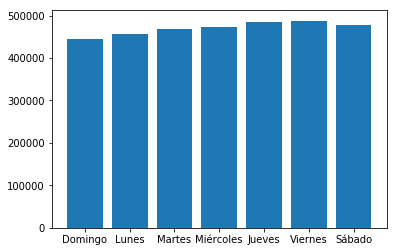

In [36]:
# Test de la función muestra_distribucion_dias
muestra_distribucion_dias(registros)